In [1]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
import numpy as np
from tensorflow.keras import datasets, layers, models
from keras.models import load_model
import matplotlib.pyplot as plt
import io

In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data to include a single color channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


# Brif info about Dataset 

The MNIST (Modified National Institute of Standards and Technology) dataset is a widely used benchmark in machine learning, particularly for training and testing models in image classification tasks. It consists of 70,000 grayscale images of handwritten digits, ranging from 0 to 9. 

- **Training Set**: 60,000 images
- **Test Set**: 10,000 images
- **Image Size**: Each image is 28x28 pixels, resulting in 784 pixels per image.
- **Label**: Each image is labeled with the corresponding digit (0-9) it represents.

The dataset is often used to demonstrate the performance of various machine learning algorithms, particularly in the context of neural networks and deep learning. Its simplicity and standardized format make it an excellent starting point for beginners in the field.

In [3]:
#BUILD THE MODEL
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


E:\Users\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# brif about building model

1. Model Initialization
models.Sequential(): This initializes a sequential model, which means that the layers will be stacked one after another in a linear fashion.
2. First Convolutional Layer
Conv2D(32, (3, 3), activation='relu'): This is a 2D convolutional layer that applies 32 filters, each of size 3x3, to the input image. The relu (Rectified Linear Unit) activation function introduces non-linearity, helping the model to learn complex patterns.
input_shape=(28, 28, 1): This specifies the shape of the input data. The images are 28x28 pixels with 1 channel (grayscale).
3. First Pooling Layer
MaxPooling2D((2, 2)): This is a max pooling layer with a 2x2 filter, which reduces the spatial dimensions (height and width) of the feature maps by taking the maximum value from each 2x2 block. This helps in reducing the computational complexity and overfitting.
4. Second Convolutional Layer
Conv2D(64, (3, 3), activation='relu'): Another convolutional layer, but this time with 64 filters of size 3x3. The increased number of filters allows the model to learn more complex features.
5. Second Pooling Layer
MaxPooling2D((2, 2)): Another max pooling layer to further reduce the spatial dimensions of the feature maps.
6. Third Convolutional Layer
Conv2D(64, (3, 3), activation='relu'): A third convolutional layer with 64 filters of size 3x3. This deepens the network, allowing it to learn more abstract features.
7. Flattening Layer
Flatten(): This layer converts the 2D feature maps (output from the previous convolutional layer) into a 1D vector. This vector will be fed into the fully connected (dense) layers.
8. First Dense (Fully Connected) Layer
Dense(64, activation='relu'): A dense layer with 64 neurons, each connected to all the neurons in the previous layer. The relu activation function is used here to introduce non-linearity.
9. Output Layer
Dense(10, activation='softmax'): The output layer with 10 neurons, one for each class (0-9) in the MNIST dataset. The softmax activation function is used to convert the output into probabilities, where the highest probability corresponds to the predicted digit.

In [4]:
#COMPILE THE MODEL

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
#TRAIN THE MODEL
model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8888 - loss: 0.3484 - val_accuracy: 0.9848 - val_loss: 0.0506
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9837 - loss: 0.0499 - val_accuracy: 0.9875 - val_loss: 0.0380
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9890 - loss: 0.0333 - val_accuracy: 0.9900 - val_loss: 0.0318
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9922 - loss: 0.0246 - val_accuracy: 0.9917 - val_loss: 0.0273
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9941 - loss: 0.0178 - val_accuracy: 0.9933 - val_loss: 0.0223
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9958 - loss: 0.0127 - val_accuracy: 0.9907 - val_loss: 0.0357
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9952 - loss: 0.0132 - val_accuracy: 0.9898 - val_loss: 0.0343
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9969 - loss:

In [6]:
#EVALUATE THE MODEL PERFORMANCE
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9892 - loss: 0.0743
Test accuracy: 0.9922999739646912


WE CAN SEE THE RESULT IS VERY PROMISSING 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


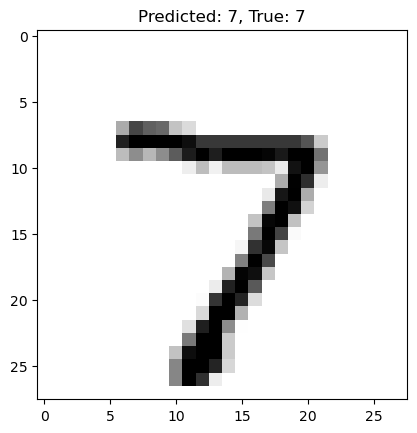

In [7]:
predictions = model.predict(test_images)

# Displaying the first image, its predicted label, and the true label
plt.imshow(test_images[0].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted: {np.argmax(predictions[0])}, True: {test_labels[0]}")
plt.show()


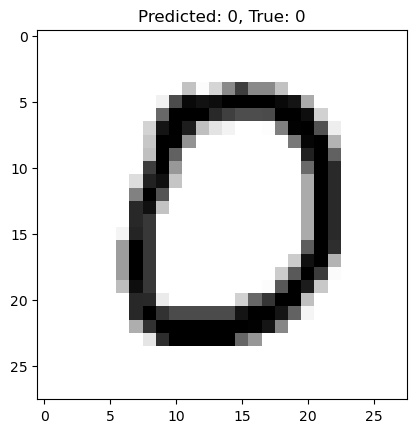

In [8]:
#CHECK OTHER IMAGES

index = 10  # Change this to check other images (0-based index)
plt.imshow(test_images[index].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted: {np.argmax(predictions[index])}, True: {test_labels[index]}")
plt.show()


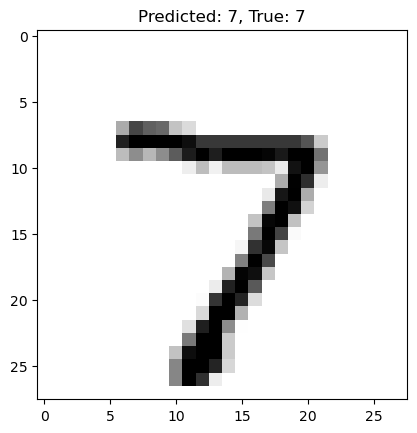

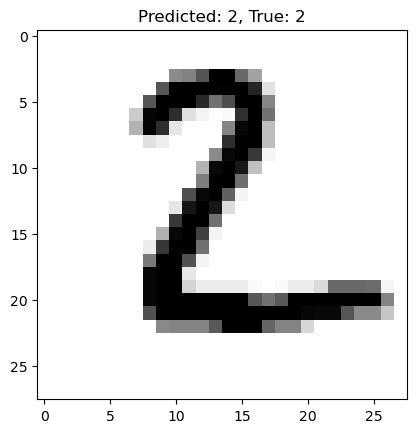

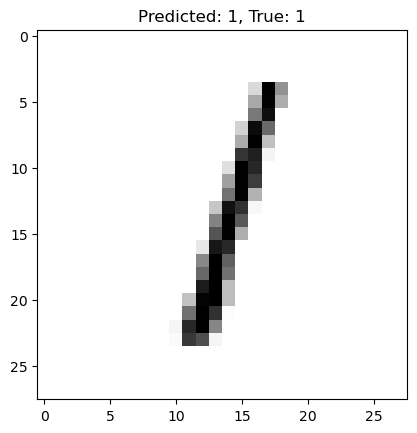

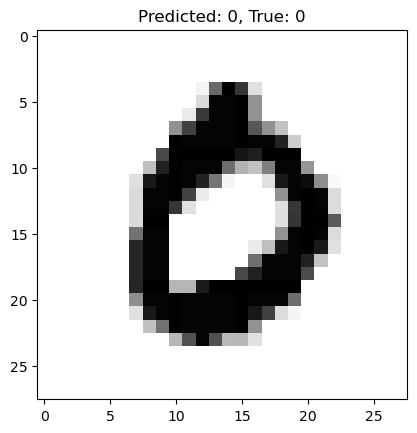

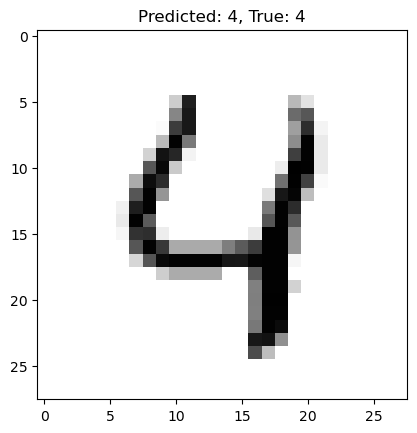

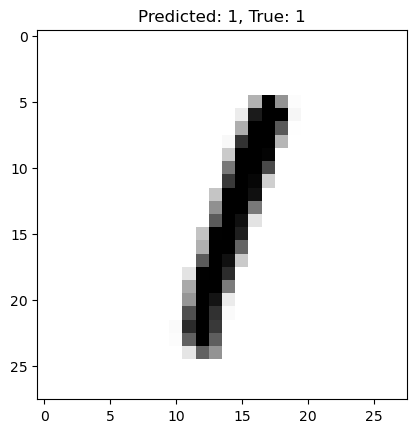

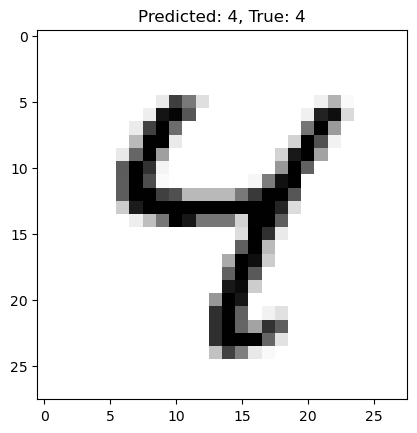

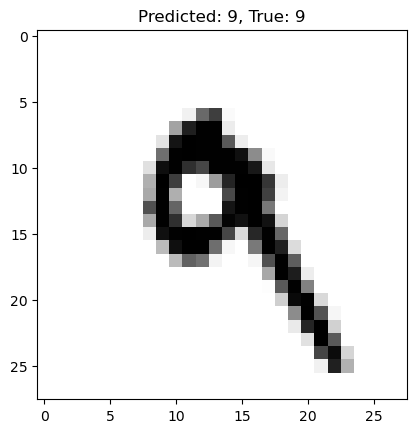

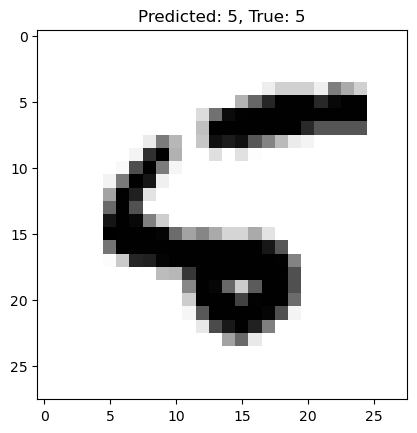

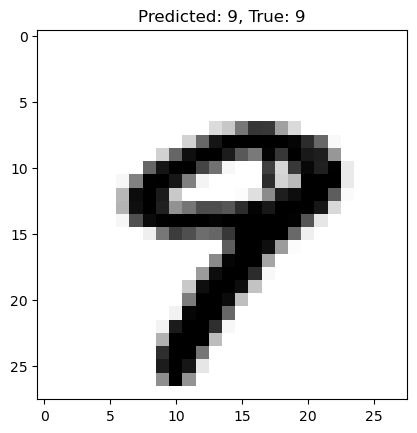

In [9]:
for i in range(10):  # Change 10 to the number of images you want to check
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {test_labels[i]}")
    plt.show()


WE CHECK WITH A QUICK OVERVIEW OF MODEL'S PERFORMANCE

In [10]:
import ipywidgets as widgets
from IPython.display import display

def show_prediction(index):
    plt.imshow(test_images[index].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Predicted: {np.argmax(predictions[index])}, True: {test_labels[index]}")
    plt.show()

# Slider to choose the image index
index_slider = widgets.IntSlider(value=0, min=0, max=len(test_images) - 1, step=1)
widgets.interactive(show_prediction, index=index_slider)


interactive(children=(IntSlider(value=0, description='index', max=9999), Output()), _dom_classes=('widget-inte…

HERE WE CREATE A SLIDE BAR FOR CHECKING THE MODELS PERFORMANCE AND WE CAN CHECK THE MODEL IS PREDICTING EVERY SINGLE DIGIT CORRECTLY

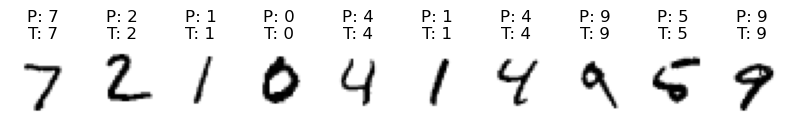

In [11]:
num_images = 10  # Number of images to display
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"P: {np.argmax(predictions[i])}\nT: {test_labels[i]}")
    plt.axis('off')

plt.show()


In [12]:
model.save('mnist_digit_recognition_model.h5')


In [28]:
pip install tensorflow pillow


Note: you may need to restart the kernel to use updated packages.


# BRIF ABOUT PILLOW

Pillow is a Python Imaging Library (PIL) fork that adds image processing capabilities to Python. In the context of deep learning, Pillow is often used for:

1. **Image Preprocessing**: Pillow can be used to open, manipulate, and save image files. Common tasks include resizing, cropping, rotating, and converting images between different formats (e.g., JPEG, PNG).

2. **Data Augmentation**: Pillow can perform simple data augmentation techniques like flipping, rotating, or adjusting brightness, which helps in creating variations of the training data, making models more robust.

3. **Integration with Deep Learning Libraries**: Pillow can easily be used with popular deep learning frameworks like TensorFlow and PyTorch for preprocessing image data before feeding it into a model.

Overall, Pillow is a handy tool in the deep learning workflow for preparing and augmenting image data.

In [15]:
#CREATE  A SIMPLE GUI WITH CANVAS
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model('mnist_digit_recognition_model.h5')

# Create the main window
window = tk.Tk()
window.title("Digit Recognizer")

# Create a canvas for drawing
canvas = tk.Canvas(window, width=200, height=200, bg='white')
canvas.grid(row=0, column=0, pady=2, sticky=tk.W, columnspan=2)

# Set up PIL to draw on the canvas
image = Image.new("L", (200, 200), color=255)
draw = ImageDraw.Draw(image)

# Function to draw on the canvas
def paint(event):
    x1, y1 = (event.x - 8), (event.y - 8)
    x2, y2 = (event.x + 8), (event.y + 8)
    canvas.create_oval(x1, y1, x2, y2, fill='black', width=15)
    draw.line([x1, y1, x2, y2], fill='black', width=15)

canvas.bind("<B1-Motion>", paint)

# Function to make a prediction
def predict_digit():
    # Resize and invert the image
    img = image.resize((28, 28))
    img = np.array(img)
    img = 255 - img  # Invert image colors
    img = img / 255.0  # Normalize the image
    img = img.reshape(1, 28, 28, 1)

    # Predict the digit
    prediction = model.predict([img])
    predicted_digit = np.argmax(prediction)
    
    # Display the result
    result_label.config(text=f"Predicted Digit: {predicted_digit}")

# Function to clear the canvas
def clear_canvas():
    canvas.delete("all")
    draw.rectangle([0, 0, 200, 200], fill="white")

# Add prediction and clear buttons
predict_button = tk.Button(window, text="Predict", command=predict_digit)
predict_button.grid(row=1, column=0, pady=2)
clear_button = tk.Button(window, text="Clear", command=clear_canvas)
clear_button.grid(row=1, column=1, pady=2)

# Add a label to show the prediction result
result_label = tk.Label(window, text="Draw a digit and press Predict")
result_label.grid(row=2, column=0, columnspan=2)

# Run the tkinter loop
window.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
